## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings, matplotlib
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

sns.set_theme(palette='flare', font_scale=1.5, rc=None)

## Data Preprocessing

In [3]:
df = pd.read_csv('../data/predictive_maintenance.csv')

In [4]:
df = df.drop(["UDI","Product ID"],axis=1)
df.head(4)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure


In [5]:
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15
df = df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"})

In [6]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.3+ KB


## EDA Analysis

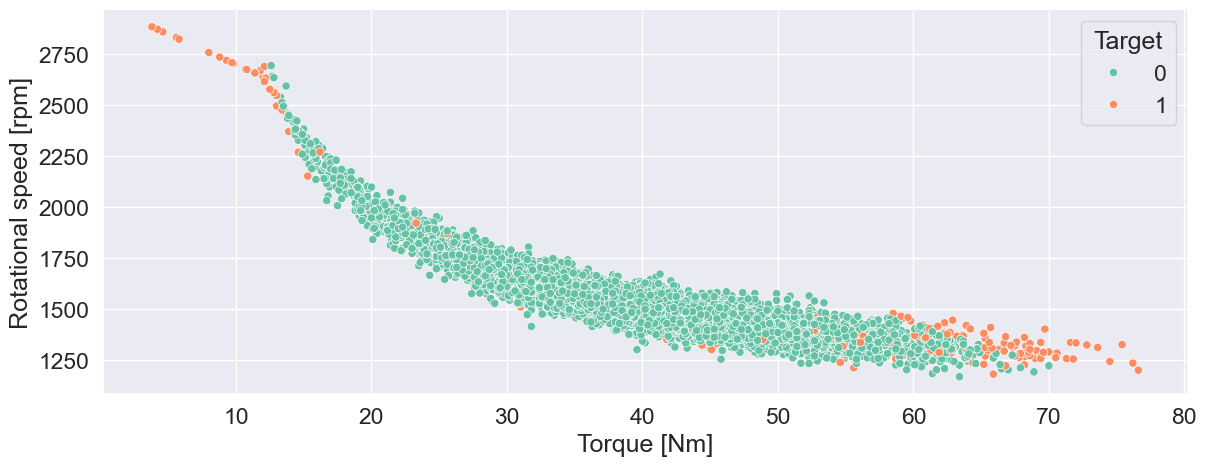

In [8]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target", palette="Set2");

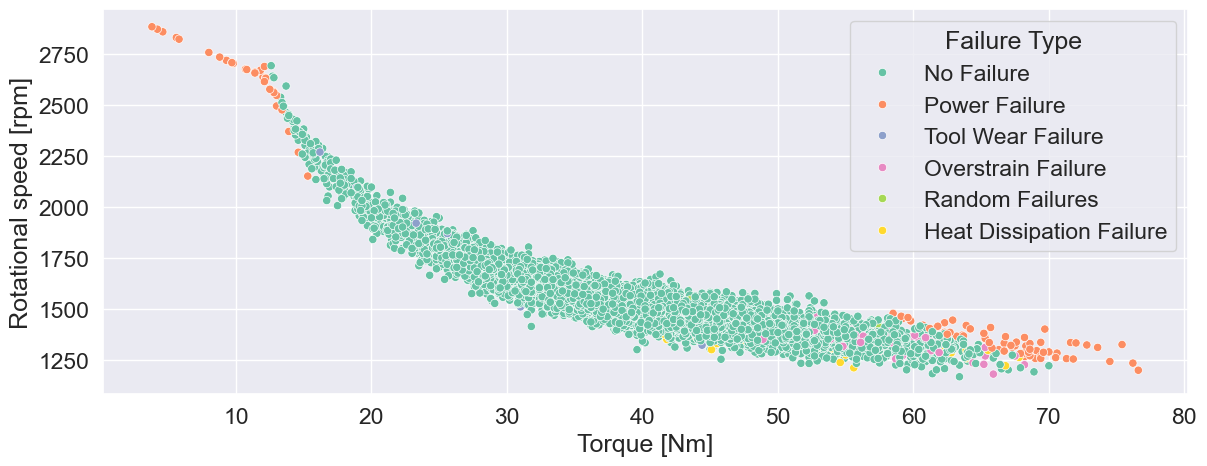

In [9]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", palette="Set2");

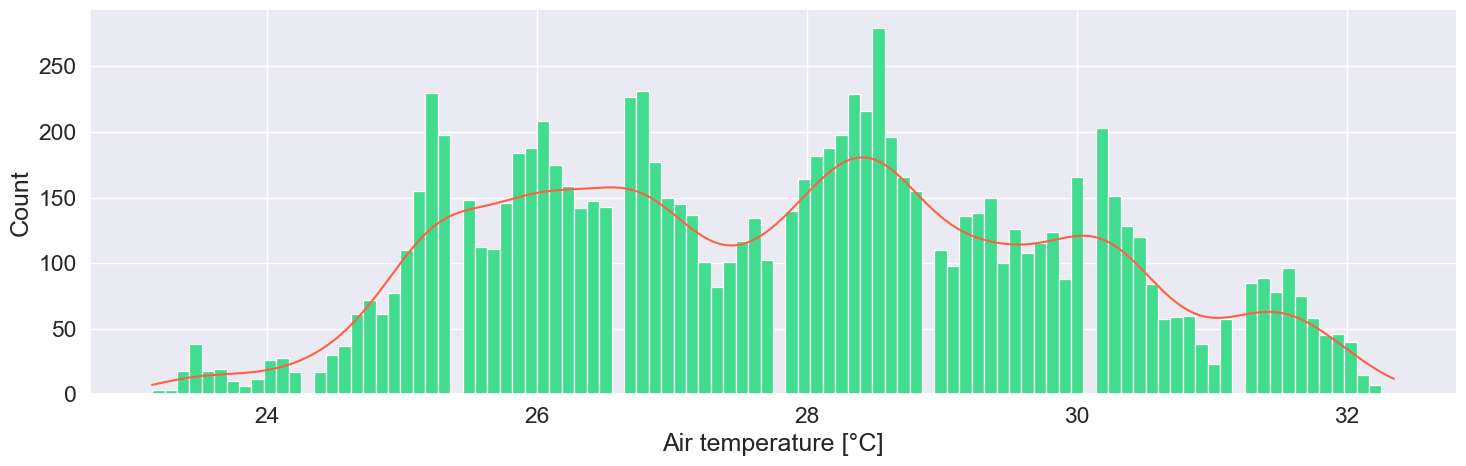

In [10]:
sns.displot(data=df, x='Air temperature [°C]', kde=True, bins=100, color='#ff6044', facecolor='#41dc8e', height=5, aspect=3);

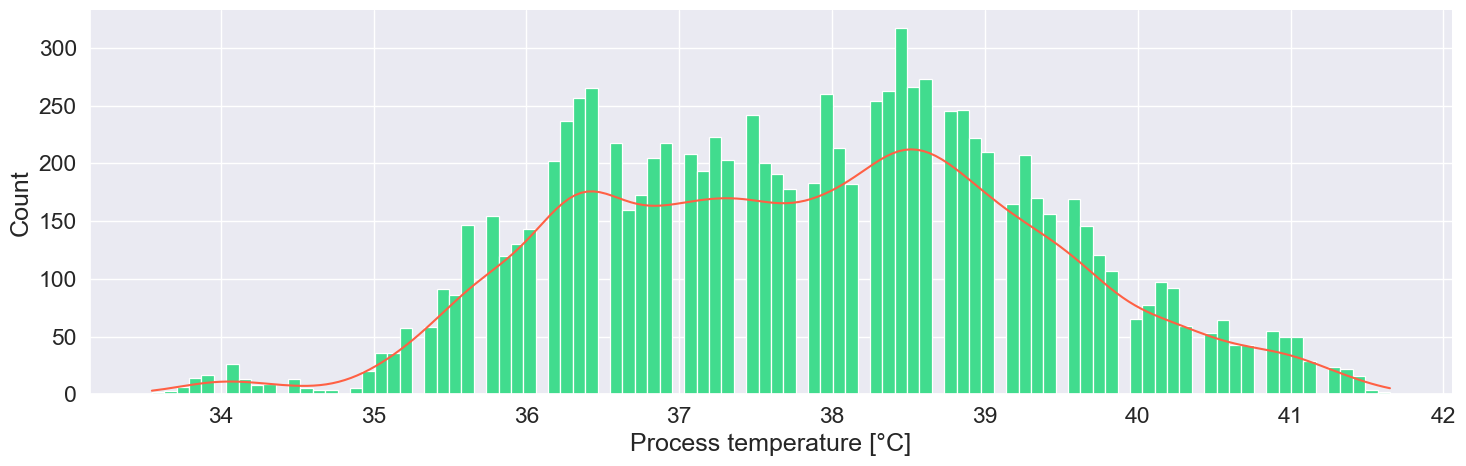

In [11]:
sns.displot(data=df, x='Process temperature [°C]', kde=True, bins=100, color='#ff6044', facecolor='#41dc8e', height=5, aspect=3);

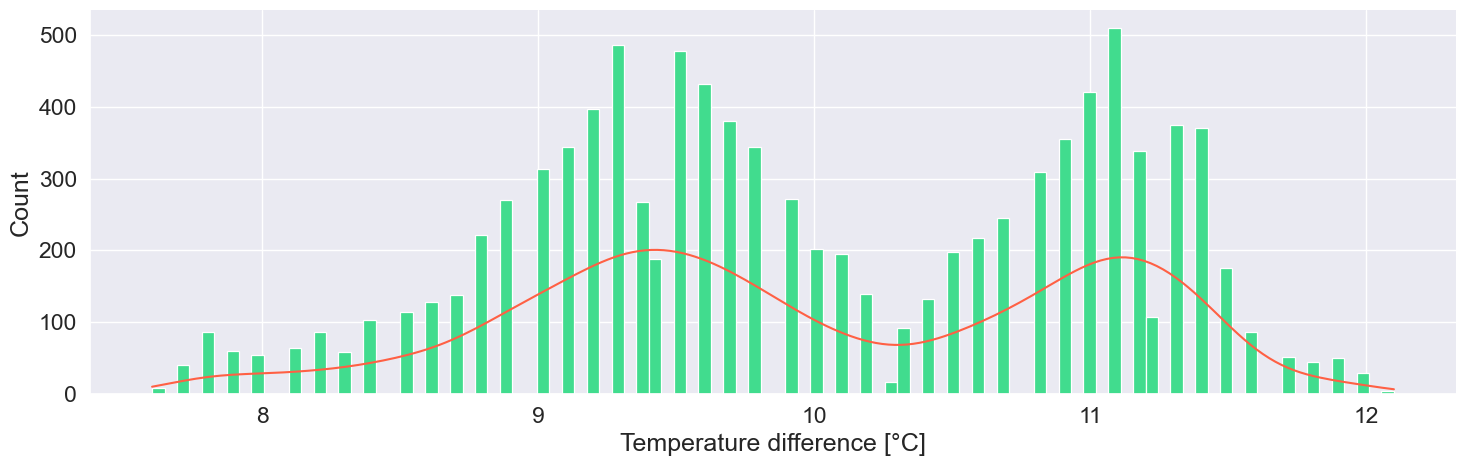

In [12]:
sns.displot(data=df, x='Temperature difference [°C]', kde=True, bins=100, color='#ff6044', facecolor='#41dc8e', height=5, aspect=3);

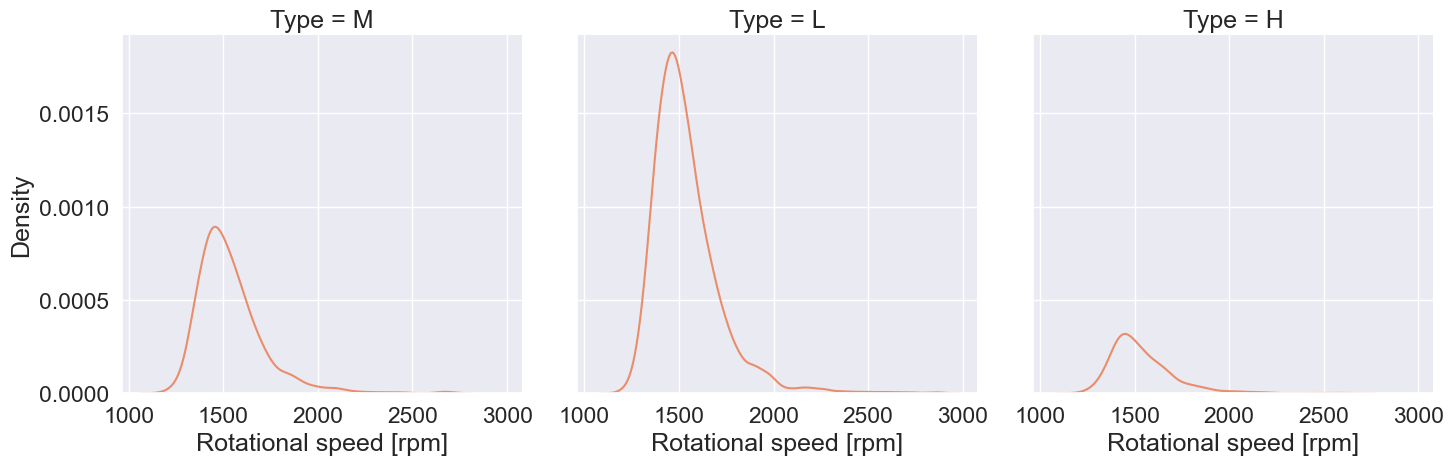

In [13]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

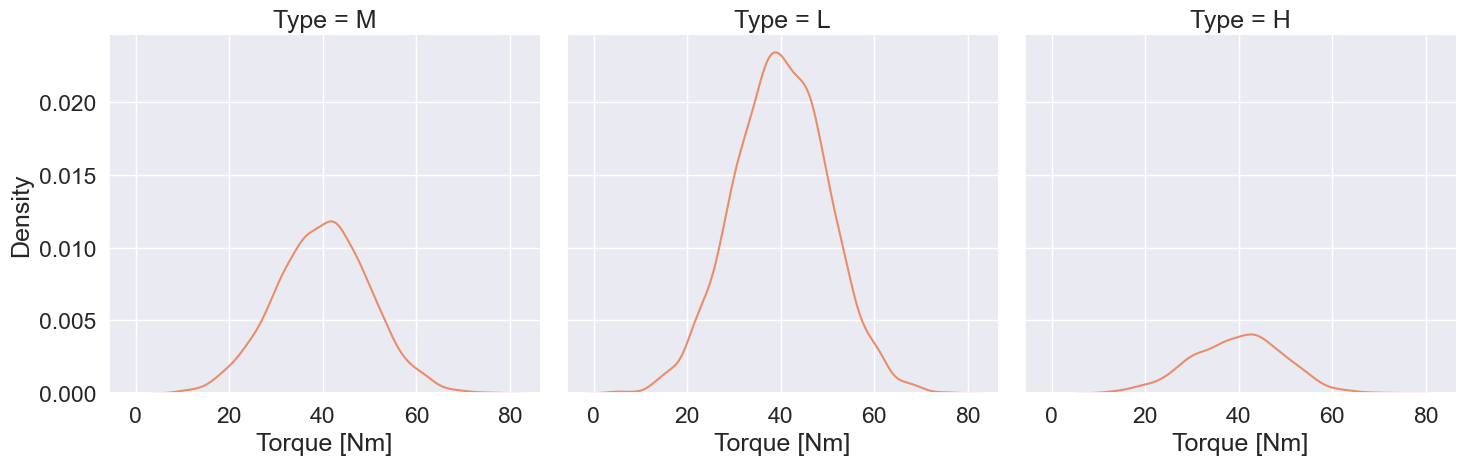

In [14]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

## Feature Selection

In [15]:
encoder = ce.OrdinalEncoder(cols=['Type', 'Failure Type'])
df = encoder.fit_transform(df)

scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [16]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

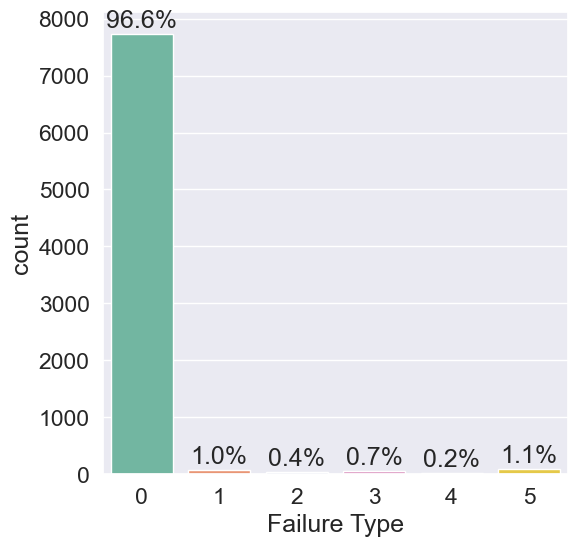

In [17]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x = y_train, palette = 'Set2')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

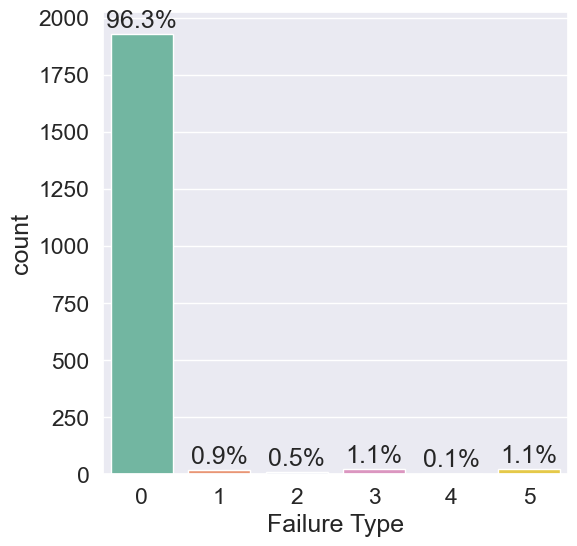

In [18]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x = y_test, palette = 'Set2')
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

## Model Selection

### 1. Logistic Regression

In [19]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

log_reg_acc = round(accuracy_score(y_pred_log_reg, y_test) * 100, 2)
log_reg_train = round(log_reg.score(X_train, y_train) * 100, 2)

print(f"Training Accuracy    : {log_reg_train}%")
print(f"Model Accuracy Score : {log_reg_acc}%")
print(f"Classification_Report: \n{classification_report(y_test,y_pred_log_reg)}")

Training Accuracy    : 96.73%
Model Accuracy Score : 96.35%
Classification_Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1927
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        10
           3       0.40      0.19      0.26        21
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        21

    accuracy                           0.96      2000
   macro avg       0.23      0.20      0.21      2000
weighted avg       0.94      0.96      0.95      2000



### 2. Random Forest Classifier

In [20]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf.score(X_train, y_train)

rf_train = round(rf.score(X_train, y_train) * 100, 2)
rf_acc = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print(f"Training Accuracy    : {rf_train}%")
print(f"Model Accuracy Score : {rf_acc}%")
print(f"Classification_Report: \n{classification_report(y_test,y_pred_rf)}")

Training Accuracy    : 100.0%
Model Accuracy Score : 99.25%
Classification_Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1927
           1       0.74      0.94      0.83        18
           2       0.80      0.80      0.80        10
           3       0.85      0.81      0.83        21
           4       0.00      0.00      0.00         3
           5       0.95      1.00      0.98        21

    accuracy                           0.99      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.99      0.99      0.99      2000



### 3. Decision Tree Classifier

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_train = round(dt.score(X_train, y_train) * 100, 2)
dt_acc = round(accuracy_score(y_pred_dt, y_test) * 100, 2)

print(f"Training Accuracy    : {dt_train}%")
print(f"Model Accuracy Score : {dt_acc}%")
print(f"Classification_Report: \n{classification_report(y_test,y_pred_dt)}")

Training Accuracy    : 100.0%
Model Accuracy Score : 99.4%
Classification_Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1927
           1       0.82      1.00      0.90        18
           2       0.90      0.90      0.90        10
           3       0.89      0.81      0.85        21
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00        21

    accuracy                           0.99      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.99      0.99      0.99      2000



### 4. Support Vector Classifier

In [22]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_acc = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print(f"Training Accuracy    : {svc_train}%")
print(f"Model Accuracy Score : {svc_acc}%")
print(f"Classification_Report: \n{classification_report(y_test,y_pred_svc)}")

Training Accuracy    : 96.61%
Model Accuracy Score : 96.4%
Classification_Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1927
           1       1.00      0.06      0.11        18
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        21

    accuracy                           0.96      2000
   macro avg       0.33      0.18      0.18      2000
weighted avg       0.94      0.96      0.95      2000



## Model Training

In [23]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Classifier'],
    'Training Accuracy': [log_reg_train, rf_train, dt_train, svc_train],
    'Model Accuracy Score': [log_reg_acc, rf_acc, dt_acc, svc_acc]
})

models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(cmap='coolwarm')

,Model,Training Accuracy,Model Accuracy Score
2,Decision Tree,100.000000,99.400000
1,Random Forest,100.000000,99.250000
3,Support Vector Classifier,96.610000,96.400000
0,Logistic Regression,96.730000,96.350000


### Result

In [24]:
result = pd.DataFrame({'Actual' : y_test , 'Predicted' : rf.predict(X_test)})
result.sample(25).style.background_gradient(cmap='coolwarm')

,Actual,Predicted
4507,0,0
7046,0,0
4275,0,0
7633,0,0
6814,0,0
3181,0,0
2501,0,0
8145,0,0
4290,0,0
7648,0,0
